# Heart Disease Prediction

#Connect all the tools


In [1]:
#connect to google drive
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [2]:
#install Kydavra
!pip install kydavra

     |████████████████████████████████| 51 kB 273 kB/s 
     |████████████████████████████████| 675 kB 9.9 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
#connect to kaggle
!mkdir -p ~/.kaggle
!cp drive/MyDrive/kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#download the dataset
!kaggle datasets download --unzip fedesoriano/heart-failure-prediction

  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 15.4MB/s]


In [5]:
#import the necessary libraries
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns

In [6]:
#read dataset
dataset = pd.read_csv('heart.csv')

#Exploratory Data Analysis


In [7]:
#save the columns for later
columns = dataset.columns

In [8]:
#verify if there are any NaN values
dataset.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
#there are not any NaN values

In [10]:
#analyze the dataset
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [11]:
#verify the dataset's columns types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [12]:
#there are no wrong data types

In [13]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


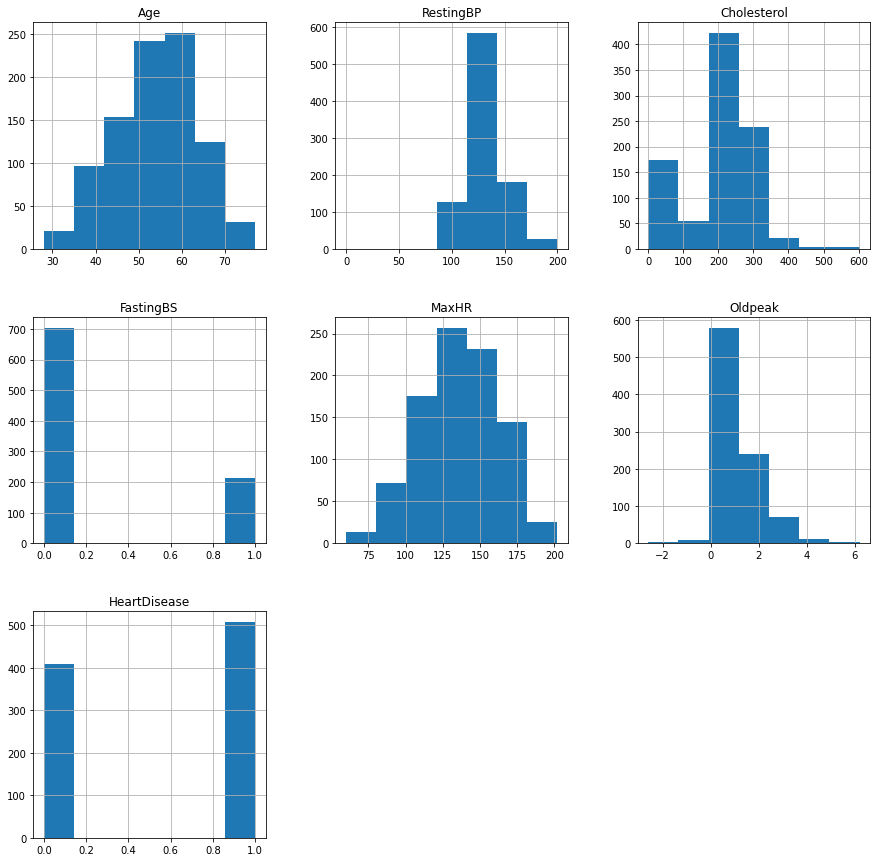

In [14]:
#plot the histograms for all the numeric columns
dataset.hist(bins=7, figsize=(15, 15))
plt.show()

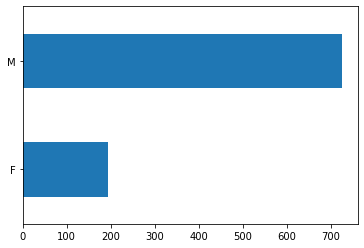

In [15]:
#plot the values for the Sex column
dataset['Sex'].value_counts().sort_values().plot(kind = 'barh')

In [16]:
#the Sex column contains 2 categorical values: M and F

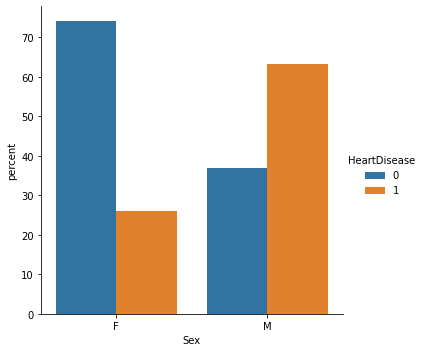

In [17]:
#Analyze the Sex column
(dataset
.groupby('Sex')['HeartDisease']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='Sex',y='percent',hue='HeartDisease',kind='bar'))

In [18]:
#Men tend to have more frequently heart diseases than women

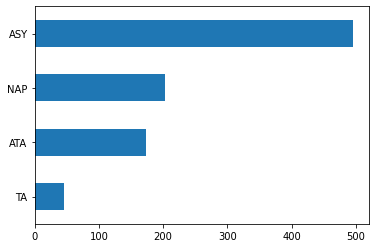

In [19]:
#plot the values for the ChestPainType column
dataset['ChestPainType'].value_counts().sort_values().plot(kind = 'barh')

In [20]:
#the ChestPainType column contains 4 categorical values: ASY, NAP, ATA, TA

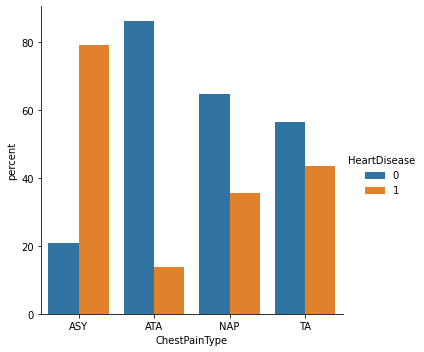

In [21]:
#Analyze the ChestPainType column
(dataset
.groupby('ChestPainType')['HeartDisease']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='ChestPainType',y='percent',hue='HeartDisease',kind='bar'))

In [22]:
#People who have ASY chest pain type most of the time have a heart disease

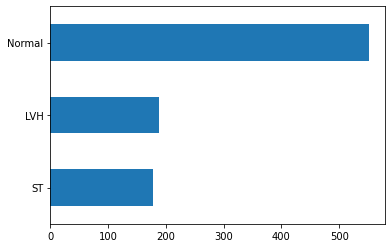

In [23]:
#plot the values for the RestingECG column
dataset['RestingECG'].value_counts().sort_values().plot(kind = 'barh')

In [24]:
#the RestingECG column contains 3 categorical values: Normal, LVH, ST

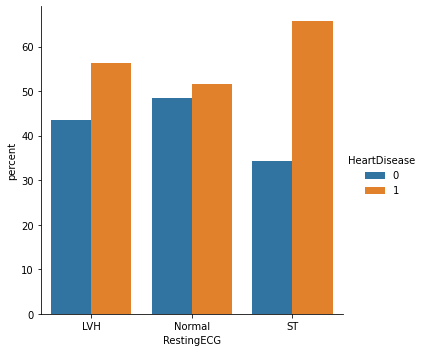

In [25]:
#Analyze the RestingECG column
(dataset
.groupby('RestingECG')['HeartDisease']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='RestingECG',y='percent',hue='HeartDisease',kind='bar'))

In [26]:
#There is a chance over 50% to have a heart disease if thepatient has a LVH or ST Resting ECG

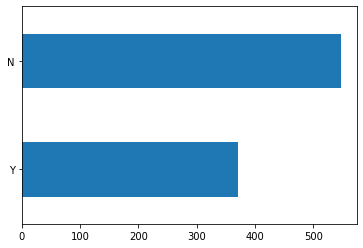

In [27]:
#plot the values for the ExerciseAngina column
dataset['ExerciseAngina'].value_counts().sort_values().plot(kind = 'barh')

In [28]:
#the ExerciseAngina column contains 2 categorical values: N and Y

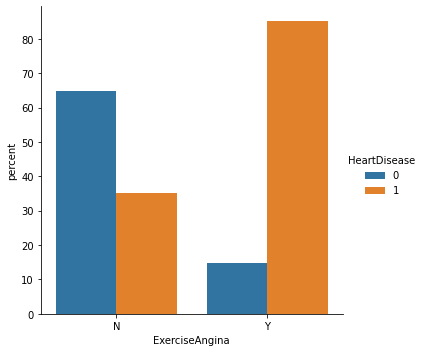

In [29]:
#Analyze the ExerciseAngina column
(dataset
.groupby('ExerciseAngina')['HeartDisease']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='ExerciseAngina',y='percent',hue='HeartDisease',kind='bar'))

In [30]:
#In over 80% of the cases, people who have exercised-induced angina have a heart disease too

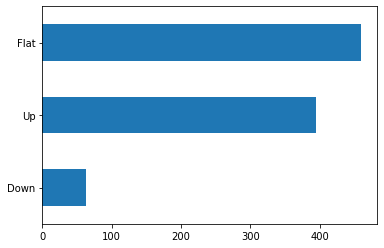

In [31]:
#plot the values for the ST_Slope column
dataset['ST_Slope'].value_counts().sort_values().plot(kind = 'barh')

In [32]:
#the ST_Slope column contains 3 categorical values: Flat, Up, Down

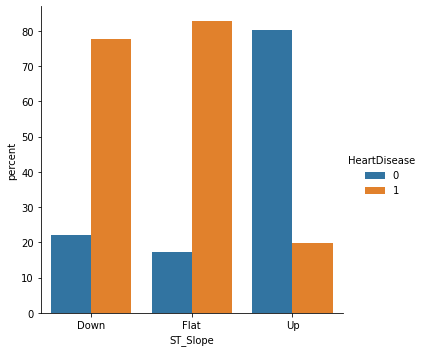

In [33]:
#Analyze the ST_Slope column
(dataset
.groupby('ST_Slope')['HeartDisease']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='ST_Slope',y='percent',hue='HeartDisease',kind='bar'))

In [34]:
#People who have a Down or Flat ST Slope have a heart disease in over 70% of the cases

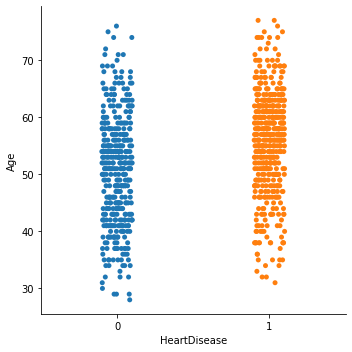

In [35]:
sns.catplot(x="HeartDisease", y="Age", hue="HeartDisease", data=dataset)

In [36]:
#People between 50 and 70 tend to have more often a heart disease than the younger

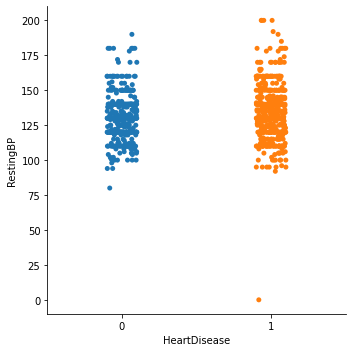

In [37]:
sns.catplot(x="HeartDisease", y="RestingBP", hue="HeartDisease", data=dataset)

In [38]:
#The values of the RestingBP doesn't seem to have a big influence onto the heart disease status

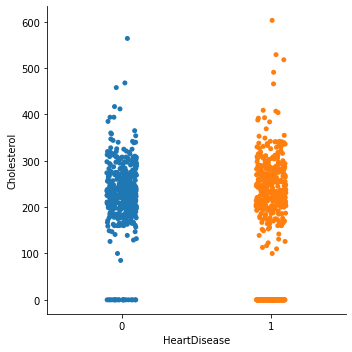

In [39]:
sns.catplot(x="HeartDisease", y="Cholesterol", hue="HeartDisease", data=dataset)

In [40]:
#The cholestelrol has a lot of of missing values which were entered as 0. We'll take care of this later.

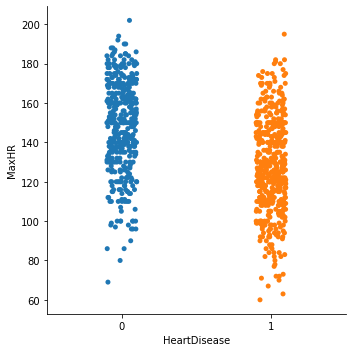

In [41]:
sns.catplot(x="HeartDisease", y="MaxHR", hue="HeartDisease", data=dataset)

In [42]:
#People with a heart disease tend to have a lower maximum heart rate.

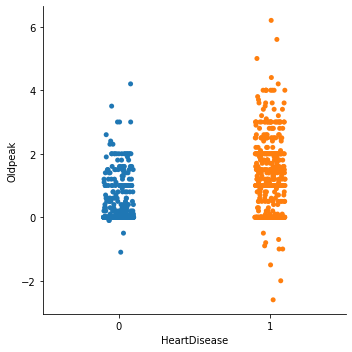

In [43]:
sns.catplot(x="HeartDisease", y="Oldpeak", hue="HeartDisease", data=dataset)

In [44]:
#People with a heart disease have a bigger range of Oldpeak value

#Data Cleaning and Preprocessing

In [45]:
# Replace 0's in Cholesterol to mean by Heart Disease group
dataset['Cholesterol'] = dataset['Cholesterol'].replace(0, np.nan)
dataset['Cholesterol'] = dataset['Cholesterol'].fillna(dataset.groupby('HeartDisease')['Cholesterol'].transform('mean'))

In [46]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,245.571653,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,53.380997,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,250.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [47]:
#let's apply feature scalling on our numerical values
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

scaler = StandardScaler()
scaler.fit(dataset[cols_to_scale])

dataset[cols_to_scale] = scaler.transform(dataset[cols_to_scale])

In [48]:
#let's apply Get Dummies on our categorical values

cols_to_encode = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

dataset = pd.get_dummies(dataset, prefix=cols_to_encode, columns=cols_to_encode)

In [49]:
#avoid the dummy variable trap
dataset.drop(columns = ['Sex_M', 'ChestPainType_TA', 'RestingECG_Normal', 'ExerciseAngina_N', 'ST_Slope_Up'], axis = 1, inplace = True)

#Feature Selection

In [50]:
#print the correlation
dataset.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,RestingECG_LVH,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat
Age,1.000000,0.254399,0.057476,0.198039,-0.382045,0.258612,0.282039,-0.055750,0.166607,-0.218165,-0.011335,0.145727,0.136798,0.215793,0.138397,0.185568
RestingBP,0.254399,1.000000,0.077830,0.070193,-0.112135,0.164803,0.107589,-0.005133,0.048824,-0.046153,-0.041348,0.053166,0.090447,0.155101,-0.007912,0.099207
Cholesterol,0.057476,0.077830,1.000000,0.060308,-0.029109,0.052612,0.114544,0.095458,0.094552,-0.023945,-0.065595,0.069770,-0.021232,0.082909,-0.006271,0.101738
FastingBS,0.198039,0.070193,0.060308,1.000000,-0.131438,0.052698,0.267291,-0.120076,0.131176,-0.140514,-0.039249,-0.011656,0.127110,0.060451,0.105102,0.107006
MaxHR,-0.382045,-0.112135,-0.029109,-0.131438,1.000000,-0.160691,-0.400421,0.189186,-0.354963,0.253735,0.134580,0.125793,-0.157879,-0.370425,-0.073316,-0.342581
Oldpeak,0.258612,0.164803,0.052612,0.052698,-0.160691,1.000000,0.403951,-0.105734,0.280026,-0.262124,-0.106212,0.086794,0.055958,0.408752,0.322130,0.283295
HeartDisease,0.282039,0.107589,0.114544,0.267291,-0.400421,0.403951,1.000000,-0.305445,0.516716,-0.401924,-0.212964,0.010670,0.102527,0.494282,0.122527,0.554134
Sex_F,-0.055750,-0.005133,0.095458,-0.120076,0.189186,-0.105734,-0.305445,1.000000,-0.183876,0.161522,0.066486,0.049518,-0.063715,-0.190664,-0.066036,-0.116077
ChestPainType_ASY,0.166607,0.048824,0.094552,0.131176,-0.354963,0.280026,0.516716,-0.183876,1.000000,-0.522432,-0.577670,0.002289,0.076438,0.430034,0.103407,0.303645
ChestPainType_ATA,-0.218165,-0.046153,-0.023945,-0.140514,0.253735,-0.262124,-0.401924,0.161522,-0.522432,1.000000,-0.256767,-0.085791,-0.046111,-0.300365,-0.097754,-0.304667


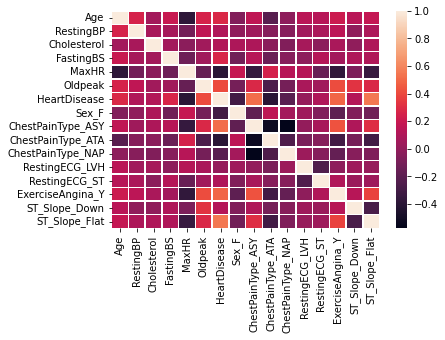

In [51]:
# plotting correlation heatmap
ax = sns.heatmap(dataset.corr(), linewidth=0.5)
plt.show()

In [52]:
#Heart disease has a big correlation with MaxHR,	Oldpeak, ChestPainType_ASY,	ChestPainType_ATA, ExerciseAngina_Y,	ST_Slope_Flat

In [53]:
#let's get rid of multicollinearity
from kydavra import LDAReducer
ldar = LDAReducer()
new_data = ldar.reduce(dataset, 'HeartDisease')

In [54]:
new_data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,RestingECG_LVH,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ChestPainType_ASY_ChestPainType_ATA_ChestPainType_NAP
0,-1.433140,0.410909,0.813998,0,1.382928,-0.832432,0,0,0,0,0,0,0,0
1,-0.478484,1.491752,-1.229040,0,0.754157,0.105664,1,1,0,0,0,0,1,0
2,-1.751359,-0.129513,0.701537,0,-1.525138,-0.832432,0,0,0,1,0,0,0,0
3,-0.584556,0.302825,-0.591762,0,-1.132156,0.574711,1,1,0,0,1,0,1,1
4,0.051881,0.951331,-0.947888,0,-0.581981,-0.832432,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.345411,0,-0.188999,0.293283,1,0,0,0,0,0,1,0
914,1.536902,0.627078,-0.985375,1,0.164684,2.357094,1,0,0,0,0,0,1,1
915,0.370100,-0.129513,-2.147470,0,-0.857069,0.293283,1,0,0,0,1,0,1,1
916,0.370100,-0.129513,-0.179406,0,1.461525,-0.832432,1,1,1,0,0,0,1,0


In [55]:
#split the features
X = new_data.drop(columns = 'HeartDisease', axis = 1)
y = new_data['HeartDisease']

In [56]:
#Backward Elimination
import statsmodels.api as sm
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Age', 'FastingBS', 'Oldpeak', 'Sex_F', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ChestPainType_ASY_ChestPainType_ATA_ChestPainType_NAP']


In [57]:
#We will use the returned columns: 'Age', 'FastingBS', 'Oldpeak', 'Sex_F', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ChestPainType_ASY_ChestPainType_ATA_ChestPainType_NAP'

# Split into Test set and Train set

In [58]:
#split the dataset into test and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[selected_features_BE], y, random_state = 0)

In [59]:
X_train

,Age,FastingBS,Oldpeak,Sex_F,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ChestPainType_ASY_ChestPainType_ATA_ChestPainType_NAP
279,0.051881,0,-0.832432,1,0,0,0,0
451,1.112610,0,0.105664,0,1,0,1,1
39,-0.584556,0,0.105664,1,1,0,1,1
557,0.264027,1,0.856140,0,1,0,1,0
548,1.324756,0,0.574711,0,0,0,0,1
...,...,...,...,...,...,...,...,...
835,0.051881,0,1.794236,0,1,0,1,1
192,-0.584556,0,-0.832432,0,0,0,0,0
629,0.370100,0,-0.832432,1,0,0,0,1
559,1.112610,0,2.919951,0,1,1,0,1


In [60]:
X_test

,Age,FastingBS,Oldpeak,Sex_F,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ChestPainType_ASY_ChestPainType_ATA_ChestPainType_NAP
306,0.157954,1,-0.738623,0,0,0,1,1
711,1.324756,0,-0.457194,0,0,0,1,1
298,-0.266338,1,-0.832432,0,0,0,1,1
466,0.157954,0,1.512807,0,1,0,1,0
253,0.900464,0,0.105664,0,0,0,0,0
...,...,...,...,...,...,...,...,...
352,0.264027,0,-1.770528,0,1,1,0,1
172,-0.054192,0,-0.832432,0,0,0,0,0
479,0.264027,0,1.512807,0,1,0,1,0
330,0.688318,1,1.418998,0,0,0,0,0


In [61]:
y_train

279    0
451    1
39     0
557    1
548    1
      ..
835    1
192    0
629    0
559    1
684    1
Name: HeartDisease, Length: 688, dtype: int64

In [62]:
y_test

306    1
711    0
298    1
466    1
253    0
      ..
352    1
172    0
479    1
330    1
529    1
Name: HeartDisease, Length: 230, dtype: int64

# Model Creation

In [63]:
#import models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

In [64]:
#create a list of the models to use it later
models = [
          KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski'),
          DecisionTreeClassifier(random_state = 0),
          RandomForestClassifier(n_estimators = 500, random_state = 0),
          LogisticRegression(random_state = 0),
          BernoulliNB()
]

In [65]:
#import accuracy score
from sklearn.metrics import accuracy_score

In [66]:
#create a function that will train the models and will return a dictionary of their accuracy score
def test_model(trainx, testx, trainy, testy, models):
  accuracy = {}
  for i in range(len(models)):
        models[i].fit(trainx, trainy)
        y_pred = models[i].predict(testx)

        accuracy[str(models[i].__class__())] = accuracy_score(testy, y_pred)

  return accuracy

In [67]:
#get the accuracy score
accuracy = test_model(X_train, X_test, y_train, y_test, models)

In [68]:
#print the accuracy score and select the best model
accuracy

{'BernoulliNB()': 0.8347826086956521,
 'DecisionTreeClassifier()': 0.7782608695652173,
 'KNeighborsClassifier()': 0.8347826086956521,
 'LogisticRegression()': 0.8260869565217391,
 'RandomForestClassifier()': 0.8130434782608695}

In [69]:
#We have got 2 models that performed the best: BernoulliNB and KNeighborsClassifier

In [70]:
#We are going to use the KNeighborsClassifier model

In [71]:
models[0]

KNeighborsClassifier()

#Download the model

In [72]:
import pickle
pickle.dump(models[0], open('finalized_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

#Conclusion


We have worked on a dataset that predicts whether a person has a heart disease or not.

Initially, we had 11 features and after some transformations, we ended up working with 8 columns, obtaining 2 models that performed the best: BernoulliNB and KNeighborsClassifier, both having an accuracy over 83%.

Futurework:
* Try different feature selection methods
* Compare the confussion matrix of the models
* Deploy the models